


Aluno: Luiz Yokoyama Felix de Souza 

---

#Especificação do problema : Lógica nebulosa

O setor de aluguéis de imóveis movimenta milhões por ano. Com a pandemia do coronavírus, esse setor tem sido forçado a se reinventar, uma vez que o contato direto (presencial) entre os interessados em alugar um imóvel e os corretores tem sido prejudicado. Você foi contratado por uma empresa do setor para projetar e implementar um sistema que faça sugestões para os clientes de imóveis que possam ser do seu interesse. 

Utilizando a base de dados [brazilian_houses_to_rent](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent), analise os dados necessários para que projete e implemente um sistema de recomendação, que identifique os imóveis mais adequados às necessidades de um determinado cliente.


# INSTRUÇÕES DE USO:

***Executar os blocos de códigos, um a um;***

***Carregar o arquivo houses_to_rent_v2.csv, quando solicitado; disponível em https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent***

***Inserir os valores solicitados para a simulação de uso da ferramenta.***

# Análise de dados

referências:

https://seaborn.pydata.org/

https://matplotlib.org/

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
print('carregue o arquivo houses_to_rent_v2.csv'); files.upload()   
#df= pd.read_csv('houses_to_rent.csv', index_col= 0)
df= pd.read_csv('houses_to_rent_v2.csv')

# DISPONÍVEIS 2 ARQUIVOS
# O ARQUIVO houses_to_rent.csv SÓ POSSUI VALORES 0 E 1 NO CAMPO CITY
# O ARQUIVO houses_to_rent_v2.csv SÓ POSSUI NOMES DE CIDADE NO CAMPO CITY
# USAR O QUE POSSUI NOMES DE CIDADES FAZ MAIS SENTIDO

carregue o arquivo houses_to_rent_v2.csv


Saving houses_to_rent_v2.csv to houses_to_rent_v2.csv


**Dados de casas para alugar**

https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent?select=houses_to_rent_v2.csv

**Descrição constante na plataforma Kaggle**

Este dataset possui 10962 casas para alugar com 13 classes diferentes.

**O autor do dataset esclaresceu muitas dúvidas na área de discussão da plataforma.**

**Outliers:** Este dataset pode conter alguns valores errados, como erros de digitação. Tendo em vista que foi utilizado um WebCrawler apenas para pegar os dados, os mesmos estão sujeitos a problemas como erros nos cadastros.


**Mudanças de dados entre as versões de dataset:** Visto que o WebCrawler foi rodado em dias diferentes para cada versão do dataset, podem haver diferenças como adição ou exclusão de casas (alem das cidades adicionadas).

Todos os dados foram retirados de informações disponíveis gratuitamente na internet e compilados apenas para facilitar o acesso.

**Segundo o autor do dataset, os dados foram retirados de um site de aluguel de imóveis.**

Na primeira versão do dataset, o campo city possui apenas o valor  0 para Campinas e 1 para São Paulo. 

Já na **segunda versão**,  campo city possui nomes de várias cidades.

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**TRADUÇÃO DOS CAMPOS /LUIZ**

**original: tradução/explicação [valores possíveis] (unidade)**

**city**: cidade [Belo Horizonte, Campinas, Rio de Janeiro, São Paulo, Porto Alegre]

**area**: área do imovel (m²)

**rooms**: quantidade de quartos

**bathroom**: quantidade de banheiros

**parking spaces**: quantidade de vagas de estacionamento

**floor**: piso [número do andar do apartamento ou "-"] /conforme explicou o autor, "-" pode indicar uma casa ou não sabe o andar

**animal**: permite animais - [aceita/não aceita]

**furniture**:	mobiliário - [mobiliado/não mobiliado]

**hoa** (homeowners association tax): taxa de condomínio  (R$)

**rent amount**: valor do aluguel  (R$)

**property tax**:	imposto sobre a propriedade  (R$)

**fire insurance**:	seguro contra incêndio (R$) /Conforme a lei nº 8.245, de 18 de outubro de 1991, seção IV, também conhecida como a lei do Inquilinato, este seguro é de responsabilidade do locador (proprietário do imóvel), mas ele pode estabelecer no contrato que o locatário deve arcar com os custos do seguro. Já o valor do seguro, geralmente é anual e varia de acordo a seguradora, com o valor do imóvel e a localização da propriedade, além dos itens que vão ser cobertos por ele.

**total**: custo total (R$) /conforme explicou o autor, esse valor total pode apresentar algumas variações em relação a soma dos quatro valores anteriores.


In [ ]:
#Verifica se tem buracos /LUIZ
if df.isnull().values.any():
  print('Existem buracos')
else:
  print('A BASE DE DADOS NÃO TEM "BURACOS"')

A BASE DE DADOS NÃO TEM "BURACOS"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
type(df.floor.values.item(0))

str

O campo floor possui valores string devido ao valor "-", que segundo o autor, pode indicar que é uma casa ou que não consta o andar.

In [ ]:
df.describe(include='all')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692,10692.000000,10692.000000,10692.000000,10692.000000,10692,10692,10692,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
unique,5,NaN,NaN,NaN,NaN,35,2,2,NaN,NaN,NaN,NaN,NaN
top,São Paulo,NaN,NaN,NaN,NaN,-,acept,not furnished,NaN,NaN,NaN,NaN,NaN
freq,5887,NaN,NaN,NaN,NaN,2461,8316,8086,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.217920,2.506079,2.236813,1.609147,NaN,NaN,NaN,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,NaN,537.016942,1.171266,1.407198,1.589521,NaN,NaN,NaN,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,NaN,11.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,NaN,56.000000,2.000000,1.000000,0.000000,NaN,NaN,NaN,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,NaN,90.000000,2.000000,2.000000,1.000000,NaN,NaN,NaN,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,NaN,182.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03


As funções de pertinência podem ser divididas em 4 níveis (baixo, médio, alto e altíssimo), de acordo com o percentual de representatividade dos valores no dataset.

Uma função de pertencimento triângular precisa de 3 valores crescentes ou iguais. O valor central indica pertencimento total, os dois outros valores indicam que já não pertencem.
Por exemplo, room pode ter funções triângulares de pertencimento com os seguintes parâmetros: 

qtd_quartos_baixa = fuzz.trimf(range(1, 14), [1, 1, 3])

qtd_quartos_media = fuzz.trimf(range(1, 14), [1, 2, 4])

qtd_quartos_alta = fuzz.trimf(range(1, 14), [2, 4, 6])

qtd_quartos_altissima = fuzz.trimf(range(1, 14), [4, 13, 13])


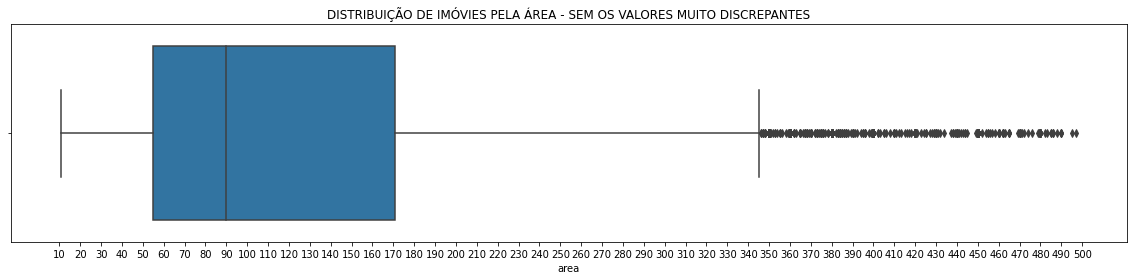

In [ ]:
temp = df.query('(area < 500)') # exclui umas poucas discrepâncias muito grandes que atrapalham a escala do gráfico
plt.figure(figsize=(20, 4)) # tamanho da figura
plt.title('DISTRIBUIÇÃO DE IMÓVIES PELA ÁREA - SEM OS VALORES MUITO DISCREPANTES')
sns.boxplot(x=temp['area']) # gráfico de caixa
plt.xticks(np.arange(10, 510, step=10)) # quantidades do eixo x para o gráfico de caixa
plt.show()

Metade do imóveis, deste dataset, possuem até 90 metros quadrados. Após cerca de 350 metros quadrados, existem poucos imóvéis disponíveis.

# Dados errados
O autor havia informado que podem existir dados errados ou discrepantes. Realmente existem alguns valores que podem ser erros de cadastro ou digitação, por exemplo. Visto que vários campos possuem valores máximos muito elevados.

Para a implementação do sistema de recomendação, será adotada a premissa de que o locatário é o responsável pelos dados fornecidos. Portanto, estes dados possivelmente errados poderão ser usados no sistema de recomendação, sem prejuízo de sua funcionalidade.

Todavia, a taxa de condomínio de mais de um milhão deve ser desconsiderada, para não atrapalhar a lógica do sistema. Visto que as outras taxas poderiam parecer baixíssimas.

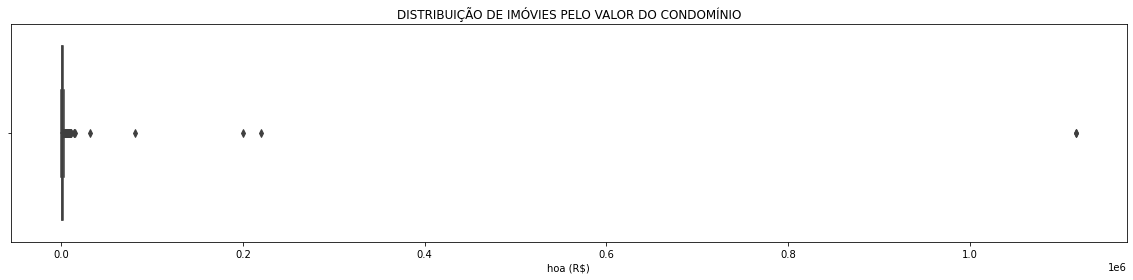

In [ ]:
plt.figure(figsize=(20, 4)) # tamanho da figura
plt.title('DISTRIBUIÇÃO DE IMÓVIES PELO VALOR DA TAXA DE CONDOMÍNIO')
sns.boxplot(x=df['hoa (R$)']) # gráfico de caixa
plt.show()

Existem valores, possivelmente cadastrados errados, que atrapalham até a visualização dos dados.

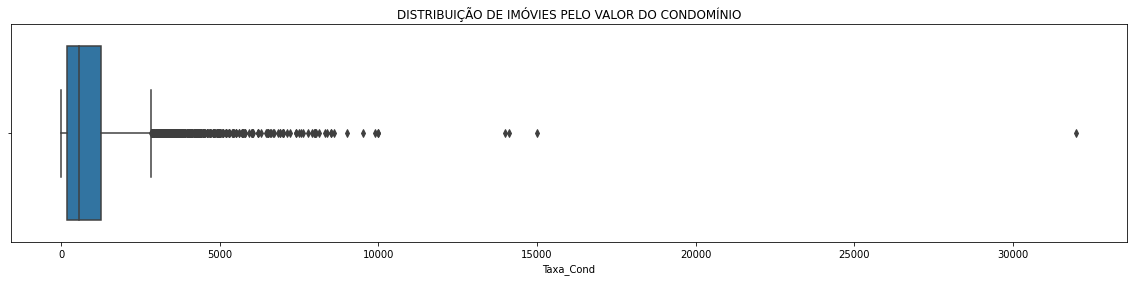

In [ ]:
t = df.rename(columns={'hoa (R$)': 'Taxa_Cond'})
temp = t.query('(Taxa_Cond < 50000)') # exclui umas poucas discrepâncias muito grandes que atrapalham a escala do gráfico
plt.figure(figsize=(20, 4)) # tamanho da figura
plt.title('DISTRIBUIÇÃO DE IMÓVIES PELO VALOR DA TAXA DE CONDOMÍNIO')
sns.boxplot(x=temp['Taxa_Cond']) # gráfico de caixa
plt.show()

As taxas de condomínio estão contidas em um intervalo de até cerca de 10.000. Acima disso, os valores são muito discrepantes.

In [ ]:
# VISUALIZAÇÃO DOS IMÓVEIS COM TAXA DE CONDOMÍNIO ACIMA DE 10.000
t.query('(Taxa_Cond > 10000)')

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Taxa_Cond,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
415,São Paulo,488,4,3,3,-,acept,not furnished,14130,6400,1214,82,21820
1213,São Paulo,850,6,7,4,-,not acept,not furnished,15000,13000,2465,196,30660
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40,11,32750
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900,58,95610
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0,51,18050
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000


# Avaliação dos campos com valores em dinheiro


O campo 'total (R$)', conforme explicou o autor, pode apresentar algumas variações em relação a soma dos quatro valores anteriores. 

Para um sistema de recomendação de imóveis para aluguel, os campos 'property tax (R\$)' e 'fire insurance (R$)' não interessam, visto que são despesas do próprietário. Consequentemente, o campo 'total (R\$)' também não interessa, já que uma parcela dele é o 'property tax (R\$)' e outra parcela é do seguro contra incêndio.

# Definição de fatores decisivos para escolha do imóvel

# Cidade do imóvel
Normalmente uma pessoa só vai querer alugar um imóvel na cidade em que reside ou pretende se mudar.

# Custos de locação
Um dos principais fatores na escolha de um imóvel para alugar é o quanto vai custar, pois precisa ser um custo adequado ao orçamento do locatário.

In [ ]:
df.city.describe()

count         10692
unique            5
top       São Paulo
freq           5887
Name: city, dtype: object

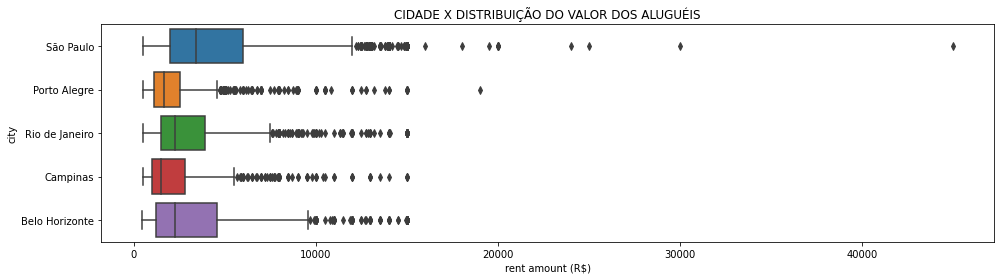

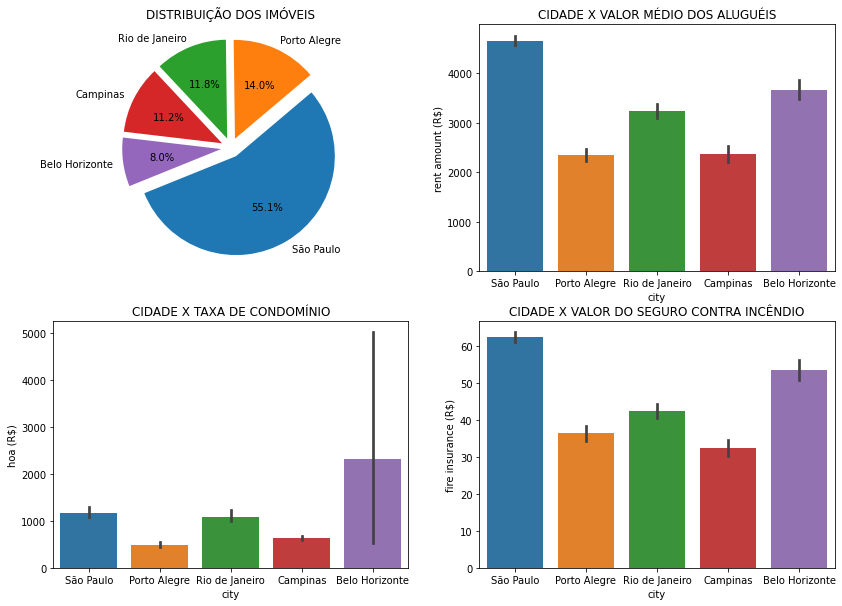

In [ ]:
# CIDADES  /LUIZ
plt.figure(figsize=(16, 4))  # tamanho da figura
plt.title('CIDADE X DISTRIBUIÇÃO DO VALOR DOS ALUGUÉIS')
sns.boxplot(y = 'city', x = 'rent amount (R$)', data = df) # gráfico de caixa
plt.show()
plt.figure(figsize=(14, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('DISTRIBUIÇÃO DOS IMÓVEIS')
plt.pie(df['city'].value_counts(), labels = ['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas', 'Belo Horizonte'],
        explode = (0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', startangle=202)  #PIZZA
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('CIDADE X VALOR MÉDIO DOS ALUGUÉIS')
sns.barplot(x=df['city'], y=df['rent amount (R$)']) # gráfico de barras
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('CIDADE X TAXA DE CONDOMÍNIO')
sns.barplot(x=df['city'], y=df['hoa (R$)']) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('CIDADE X VALOR DO SEGURO CONTRA INCÊNDIO')
sns.barplot(x=df['city'], y=df['fire insurance (R$)']) # gráfico de barras
plt.show()

O campo city possui 5 valores possíveis: Belo Horizonte, Campinas, Rio de Janeiro, São Paulo, Porto Alegre

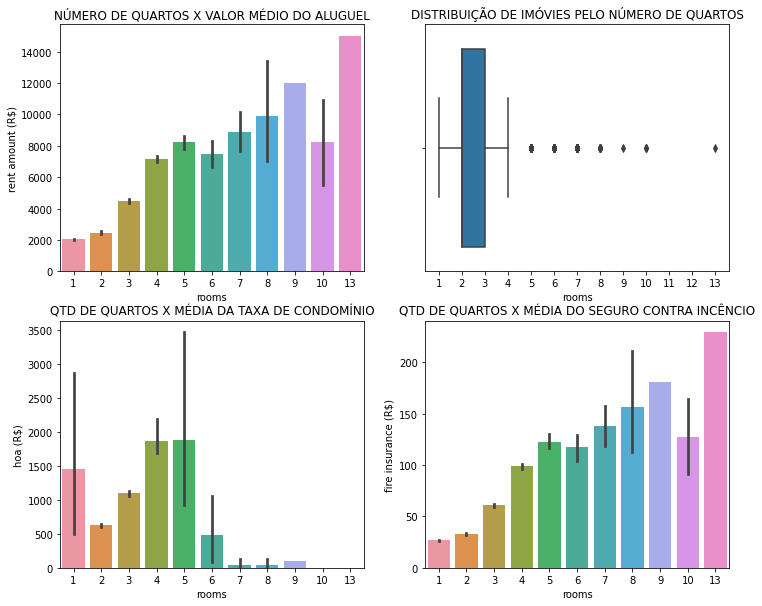

In [ ]:
# DISTRIBUIÇÃO DE QUARTOS E O PREÇO  /LUIZ
plt.figure(figsize=(12, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('NÚMERO DE QUARTOS X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x=df['rooms'], y=df['rent amount (R$)']) # gráfico de barras
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('DISTRIBUIÇÃO DE IMÓVIES PELO NÚMERO DE QUARTOS')
sns.boxplot(x=df['rooms']) # gráfico de caixa
plt.xticks(np.arange(df['rooms'].min(), df['rooms'].max() + 1, step=1)) # quantidades do eixo x para o gráfico de caixa
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('QTD DE QUARTOS X MÉDIA DA TAXA DE CONDOMÍNIO')
sns.barplot(x=df['rooms'], y=df['hoa (R$)']) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('QTD DE QUARTOS X MÉDIA DO SEGURO CONTRA INCÊNCIO')
sns.barplot(x=df['rooms'], y=df['fire insurance (R$)']) # gráfico de barras
plt.show()

O valor do aluguel, em média, geralmente é maior quando se tem mais quartos no imóvel. Metade dos imóveis do dataset tem no máximo dois quartos. Já a taxa de condomínio não apresenta um padrão único relativo à quantidade quartos no imóvel.

Os imóveis possuem até 4 quartos, com poucas exceções acima deste valor.

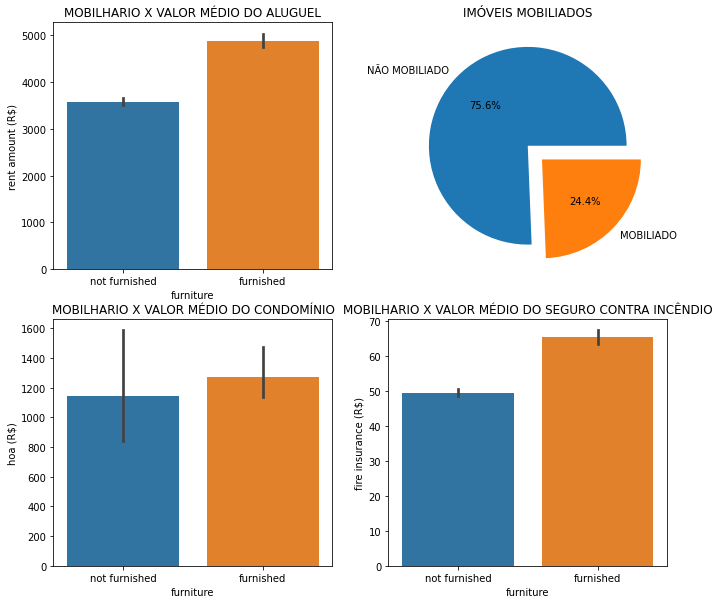

In [ ]:
# MOBILHARIO  /LUIZ
plt.figure(figsize=(11, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('MOBILHARIO X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x='furniture', y='rent amount (R$)', data=df, order=['not furnished', 'furnished']) # gráfico de barras
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('IMÓVEIS MOBILIADOS')
plt.pie(df['furniture'].value_counts(), labels = ['NÃO MOBILIADO', 'MOBILIADO'],  explode = (0, 0.2), autopct='%1.1f%%')  #PIZZA
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('MOBILHARIO X VALOR MÉDIO DO CONDOMÍNIO')
sns.barplot(x='furniture', y='hoa (R$)', data=df, order=['not furnished', 'furnished']) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('MOBILHARIO X VALOR MÉDIO DO SEGURO CONTRA INCÊNDIO')
sns.barplot(x='furniture', y='fire insurance (R$)', data=df, order=['not furnished', 'furnished']) # gráfico de barras
plt.show()

A média do valor dos aluguéis, das taxas de condomínio e dos seguros contra incêndio, são mais altas para os imóvies mobiliados. Mas os imóveis não mobiliados representam mais de 3/4 dos imóveis.





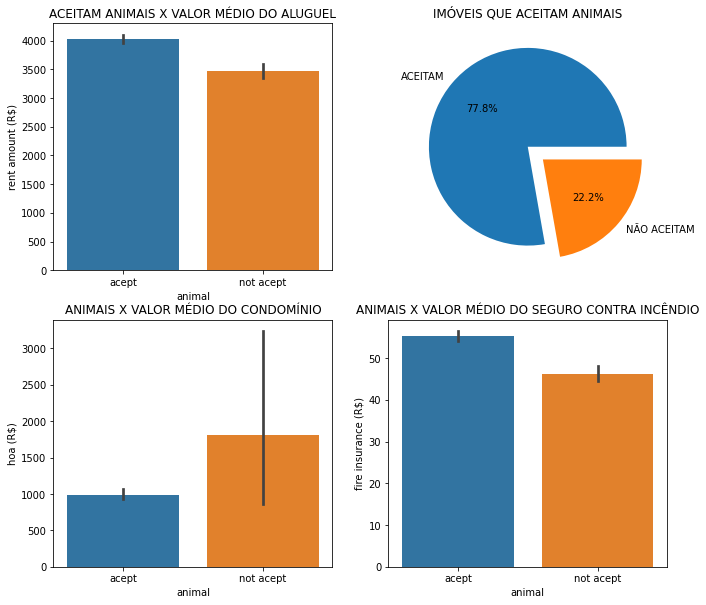

In [ ]:
# ANIMAIS  /LUIZ
plt.figure(figsize=(11, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('ACEITAM ANIMAIS X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x='animal', y='rent amount (R$)', data=df) # gráfico de barras
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('IMÓVEIS QUE ACEITAM ANIMAIS')
plt.pie(df['animal'].value_counts(), labels = ['ACEITAM', 'NÃO ACEITAM'],  explode = (0, 0.2), autopct='%1.1f%%')  #PIZZA
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('ANIMAIS X VALOR MÉDIO DO CONDOMÍNIO')
sns.barplot(x='animal', y='hoa (R$)', data=df) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('ANIMAIS X VALOR MÉDIO DO SEGURO CONTRA INCÊNDIO')
sns.barplot(x='animal', y='fire insurance (R$)', data=df) # gráfico de barras
plt.show()

A média do valor dos aluguéis é mais alta para os imóvies que aceitam animais. Já as taxas de condomínio e os seguros contra incêncio apresentam médias de valores menores para os imóveis que não aceitam animais. Os imóveis que aceitam animais representam 77,8% dos imóveis disponíveis nesta base de dados. 

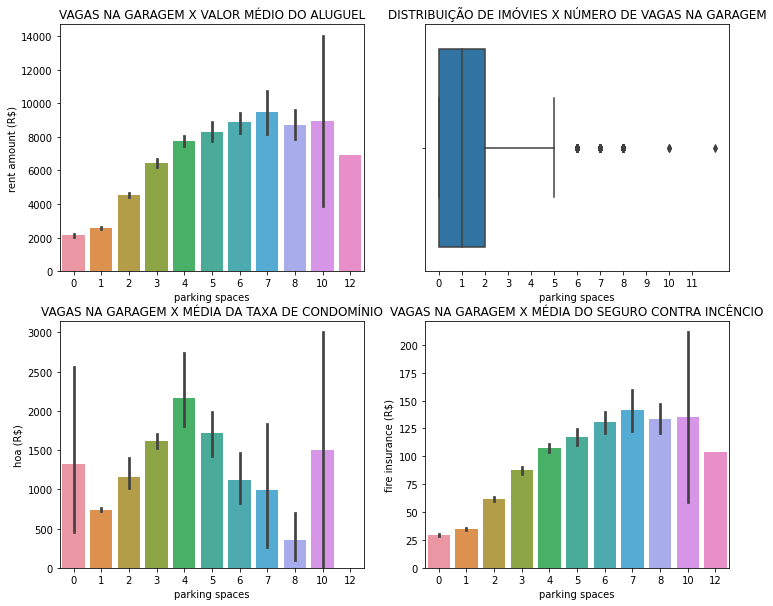

In [ ]:
# VAGAS NA GARAGEM  E O PREÇO  /LUIZ
plt.figure(figsize=(12, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('VAGAS NA GARAGEM X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x=df['parking spaces'], y=df['rent amount (R$)']) # gráfico de barras
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('DISTRIBUIÇÃO DE IMÓVIES X NÚMERO DE VAGAS NA GARAGEM')
sns.boxplot(x=df['parking spaces']) # gráfico de caixa
plt.xticks(np.arange(df['parking spaces'].min(), df['parking spaces'].max(), step=1)) # legendas do eixo x, para o gráfico de caixa
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('VAGAS NA GARAGEM X MÉDIA DA TAXA DE CONDOMÍNIO')
sns.barplot(x=df['parking spaces'], y=df['hoa (R$)']) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('VAGAS NA GARAGEM X MÉDIA DO SEGURO CONTRA INCÊNCIO')
sns.barplot(x=df['parking spaces'], y=df['fire insurance (R$)']) # gráfico de barras
plt.show()

Com excessão de acima de 7 vagas, o valor do aluguel, em média, é maior quando se tem mais vagas na garagem. Metade dos imóveis do dataset tem no máximo uma vaga de estacionamento. A taxa de condomínio não apresenta um padrão único relativo à quantidade de vagas na garagem.

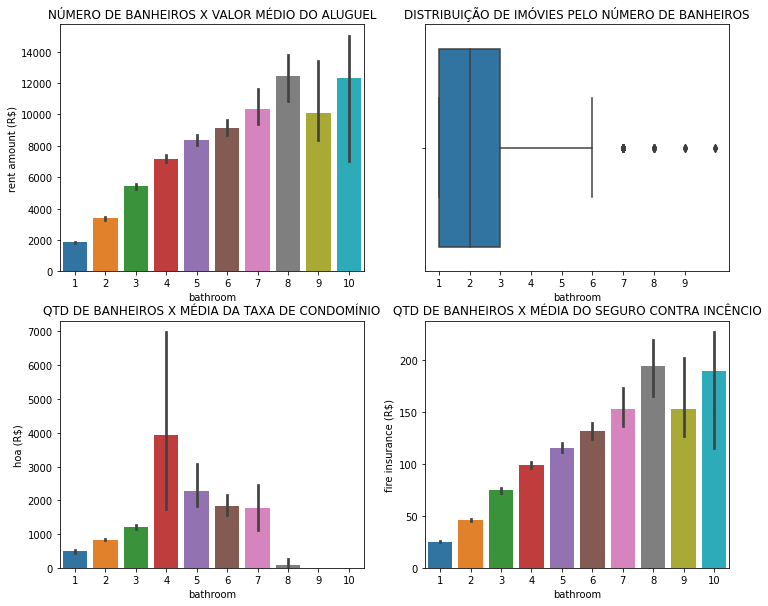

In [ ]:
# DISTRIBUIÇÃO DE BANHEIROS E O PREÇO  /LUIZ
plt.figure(figsize=(12, 10)) # tamanho da figura
plt.subplot(2, 2, 1)  # adiciona um sub-gráfico
plt.title('NÚMERO DE BANHEIROS X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x=df['bathroom'], y=df['rent amount (R$)']) # gráfico de barras
plt.subplot(2, 2, 2)  # adiciona um sub-gráfico
plt.title('DISTRIBUIÇÃO DE IMÓVIES PELO NÚMERO DE BANHEIROS')
sns.boxplot(x=df['bathroom']) # gráfico de caixa
plt.xticks(np.arange(df['bathroom'].min(), df['bathroom'].max(), step=1)) # quantidades do eixo x para o gráfico de caixa
plt.subplot(2, 2, 3)  # adiciona um sub-gráfico
plt.title('QTD DE BANHEIROS X MÉDIA DA TAXA DE CONDOMÍNIO')
sns.barplot(x=df['bathroom'], y=df['hoa (R$)']) # gráfico de barras
plt.subplot(2, 2, 4)  # adiciona um sub-gráfico
plt.title('QTD DE BANHEIROS X MÉDIA DO SEGURO CONTRA INCÊNCIO')
sns.barplot(x=df['bathroom'], y=df['fire insurance (R$)']) # gráfico de barras
plt.show()

O valor do aluguel e do seguro contra incêndio, em média, geralmente são maiores quando se tem mais banheiros no imóvel. Metade dos imóveis do dataset tem no máximo dois banheiros. Já a taxa de condomínio não apresenta um padrão único relativo à quantidade banheiros no imóvel.

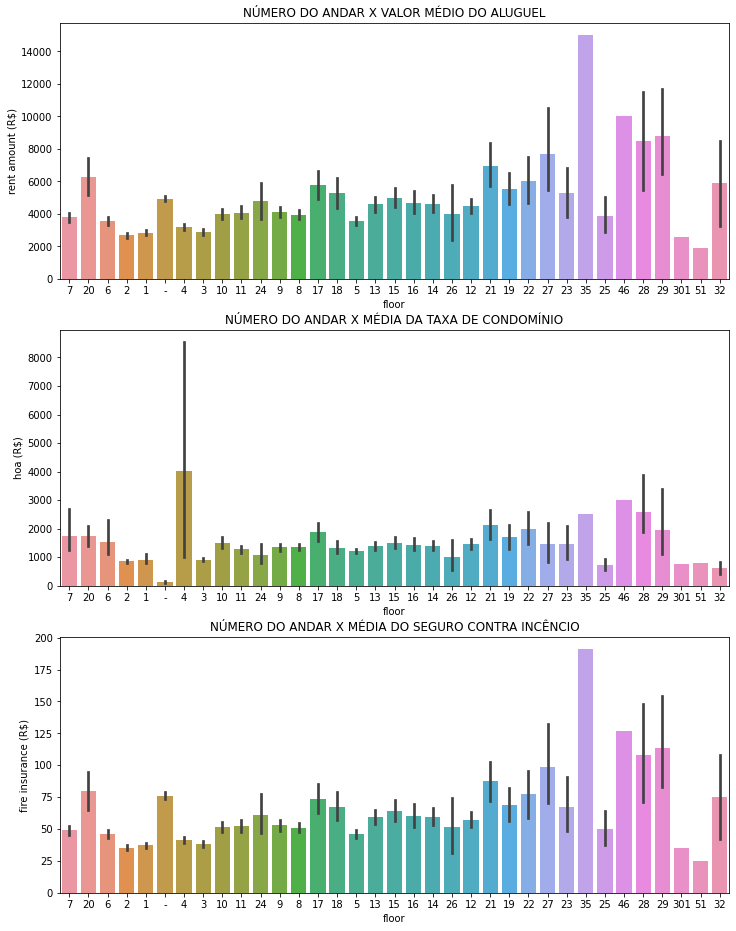

In [ ]:
# DISTRIBUIÇÃO DO ANDAR E O PREÇO  /LUIZ
plt.figure(figsize=(12, 16)) # tamanho da figura
plt.subplot(3, 1, 1)  # adiciona um sub-gráfico
plt.title('NÚMERO DO ANDAR X VALOR MÉDIO DO ALUGUEL')
sns.barplot(x=df['floor'], y=df['rent amount (R$)']) # gráfico de barras
plt.subplot(3, 1, 2)  # adiciona um sub-gráfico
plt.title('NÚMERO DO ANDAR X MÉDIA DA TAXA DE CONDOMÍNIO')
sns.barplot(x=df['floor'], y=df['hoa (R$)']) # gráfico de barras
plt.subplot(3, 1, 3)  # adiciona um sub-gráfico
plt.title('NÚMERO DO ANDAR X MÉDIA DO SEGURO CONTRA INCÊNCIO')
sns.barplot(x=df['floor'], y=df['fire insurance (R$)']) # gráfico de barras
plt.show()

O número do andar do imóvel parece não apresentar um padrão de relação com os valores cobrados.





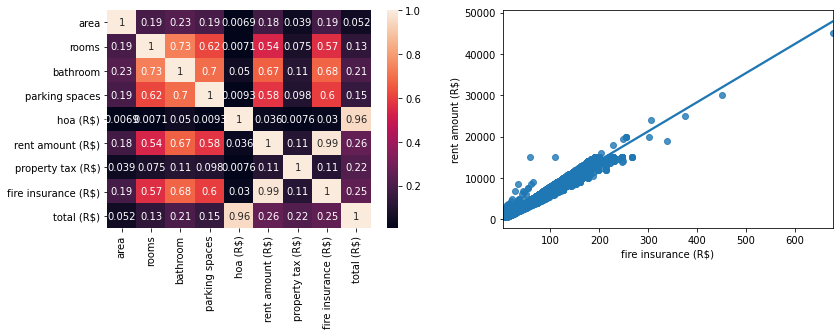

In [ ]:
# CORRELAÇÃO LINEAR /LUIZ
mc = df.corr()  # matriz de correlação
plt.subplots(figsize=(13, 4)) # tamanho da figura
plt.subplot(1, 2, 1)  # adiciona um sub-gráfico
sns.heatmap(mc, annot=True);  # mapa de calor
plt.subplot(1, 2, 2)  # adiciona um sub-gráfico
t = sns.regplot(x='fire insurance (R$)', y='rent amount (R$)', data=df) # regressão linear

O número de quartos tem alta correlação linear com o número de  banheiros (0,73) e com o número de vagas na garagem (0,62), indicando que existe uma proporcionalidade entre eles.

O número de quartos também tem uma boa correlação linear com o valor do aluguel (0,54) e com o valor do seguro contra incêndio 0,(0,57), indicando que também existe uma proporcionalidade entre eles.

Já o seguro contra incêndio é praticamente totalmente proporcional ao valor do aluguel (correlação de 0,99), indicando que basta usar o valor do aluguel como referência para o sistema de recomendação.

A área mantem um proporcionalidade geral (correlação próxima de 0,2) com a maioria dos outros campos.

O valor do condomínio tem muita influência apenas sobre o valor total (correlação de 0,96). Todavia o valor total, como já explicitado antes, não serve para o sistema de recomendação de imóveis para alugar. 




# CONCLUSÃO DA ANÁLISE

Os campos mais significativos para serem aplicados no sistema de recomendação são a cidade, se aceita animais, número de quartos, quantidade de vagas na garagem, valor do aluguel e valor do condomímio. A quantidade de banheiros e o número de vagas de estacionamento geralmente é um pouco proporcional à quantidade de quartos. Todavia a quantidade de vagas na garagem pode ser um fator determinante na escolha. Muitas pessoas tem animais e, para elas, a aceitação de animais é um fator determinante na escolha do imóvel.


O andar pode ter relevância se, no perfil do cliente, ele indicar ter prefência por andar mais alto ou mais baixo, por exemplo. Conforme informou o autor, não é possível saber se quando o campo "floor" apresentar o valor "-" indica uma casa ou se o dado estava faltando no site que foi feita a coleta dos dados.

O  imposto sobre a propriedade e o valor total não tem relevência para o sistema de recomendação de imóveis para alugar.